In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


df_CPI = pd.read_csv('CPI.csv')
df_GDP = pd.read_csv('GDP.csv')
df_unemployment = pd.read_csv('unemployment.csv')


# Check for missing values & Print the count of missing values for each column
print('Check for missing values')
print('----------------------------------------')
missing_values_CPI = df_CPI.isnull().sum()
print(missing_values_CPI)
print('----------------------------------------')
missing_values_GDP = df_GDP.isnull().sum()
print(missing_values_GDP)
print('----------------------------------------')
missing_values_unemployment = df_unemployment.isnull().sum()
print(missing_values_unemployment)

Check for missing values
----------------------------------------
DATE    0
CPI     0
dtype: int64
----------------------------------------
DATE    0
GDP     0
GDI     1
dtype: int64
----------------------------------------
DATE                 0
Unemployment rate    0
dtype: int64


In [2]:
# 线性插值填充缺失值
df_GDP_filled = df_GDP.interpolate(method='linear')


In [3]:
print('Check for missing values')
print('----------------------------------------')
missing_values_GDP_filled = df_GDP_filled.isnull().sum()
print(missing_values_GDP_filled)

Check for missing values
----------------------------------------
DATE    0
GDP     0
GDI     0
dtype: int64


In [4]:
df_CPI.describe()

CPI
count  132.000000
mean   256.885333
std     22.823229
min    230.280000
25%    238.106750
50%    251.650000
75%    265.421250
max    307.789000

In [5]:
df_GDP.describe()

GDP           GDI
count     44.000000     43.000000
mean   21036.015909  20845.632558
std     3267.499046   3045.531658
min    16648.200000  16711.500000
25%    18426.725000  18479.000000
50%    20454.750000  20205.000000
75%    22773.250000  22440.150000
max    27938.800000  26945.100000

In [6]:
df_GDP_filled.describe()

GDP           GDI
count     44.000000     44.000000
mean   21036.015909  20984.256818
std     3267.499046   3147.235842
min    16648.200000  16711.500000
25%    18426.725000  18488.100000
50%    20454.750000  20337.600000
75%    22773.250000  22824.175000
max    27938.800000  26945.100000

In [7]:
df_unemployment.describe()

Unemployment rate
count         132.000000
mean            5.117424
std             1.836754
min             3.400000
25%             3.800000
50%             4.700000
75%             5.950000
max            14.800000

In [8]:
df_CPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    132 non-null    object 
 1   CPI     132 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.2+ KB


In [9]:
df_GDP_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    44 non-null     object 
 1   GDP     44 non-null     float64
 2   GDI     44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [10]:
df_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DATE               132 non-null    object 
 1   Unemployment rate  132 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.2+ KB


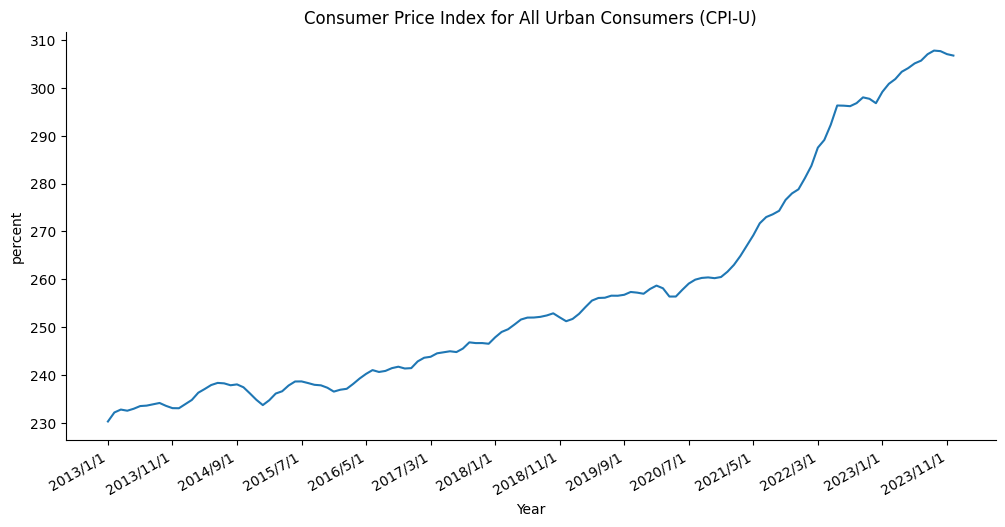

In [11]:
# 创建绘图对象和子图，调整图形尺寸
fig, ax = plt.subplots(figsize=(12, 6))  # 设置宽度为12，高度为6

# 减少x轴标签的显示数目
ax.xaxis.set_major_locator(plt.MaxNLocator(16))

# 绘制折线图
sns.lineplot(data=df_CPI, x='DATE', y='CPI', ax=ax)

# 去除上方和右方的边框
sns.despine()

# 设置图表标题和轴标签
plt.title('Consumer Price Index for All Urban Consumers (CPI-U)')
plt.xlabel('Year')
plt.ylabel('percent')

# 自动调整日期标签的间距，以避免重叠
fig.autofmt_xdate()


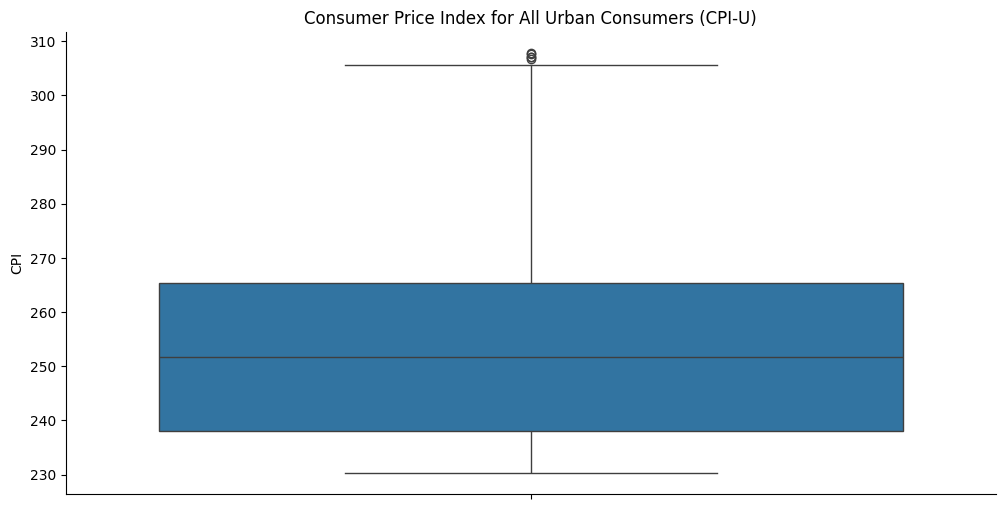

In [12]:
# 创建绘图对象和子图，调整图形尺寸
fig, ax = plt.subplots(figsize=(12, 6))  # 设置宽度为12，高度为6
# 创建箱形图
sns.boxplot(data=df_CPI, y='CPI')
sns.despine()

# 设置图形标题和标签
plt.title('Consumer Price Index for All Urban Consumers (CPI-U)')
plt.ylabel('CPI')

# 显示图形
plt.show()

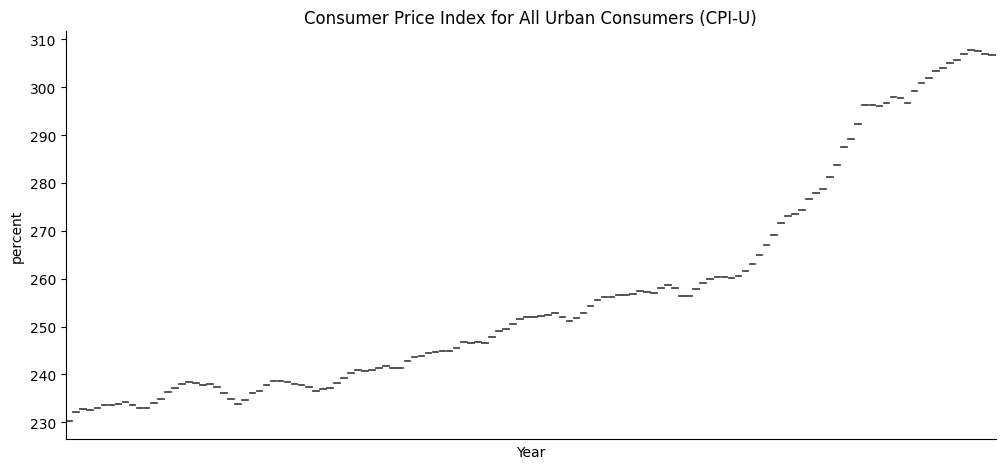

In [13]:
# 创建绘图对象和子图，调整图形尺寸
fig, ax = plt.subplots(figsize=(12, 6))  # 设置宽度为12，高度为6

# 绘制折线图
sns.violinplot(data = df_CPI, x = 'DATE', y = 'CPI')

# 去除上方和右方的边框
sns.despine()

# 隐藏X轴刻度标签和刻度线
plt.xticks([])

# 设置图表标题和轴标签
plt.title('Consumer Price Index for All Urban Consumers (CPI-U)')
plt.xlabel('Year')
plt.ylabel('percent')

# 自动调整日期标签的间距，以避免重叠
fig.autofmt_xdate()

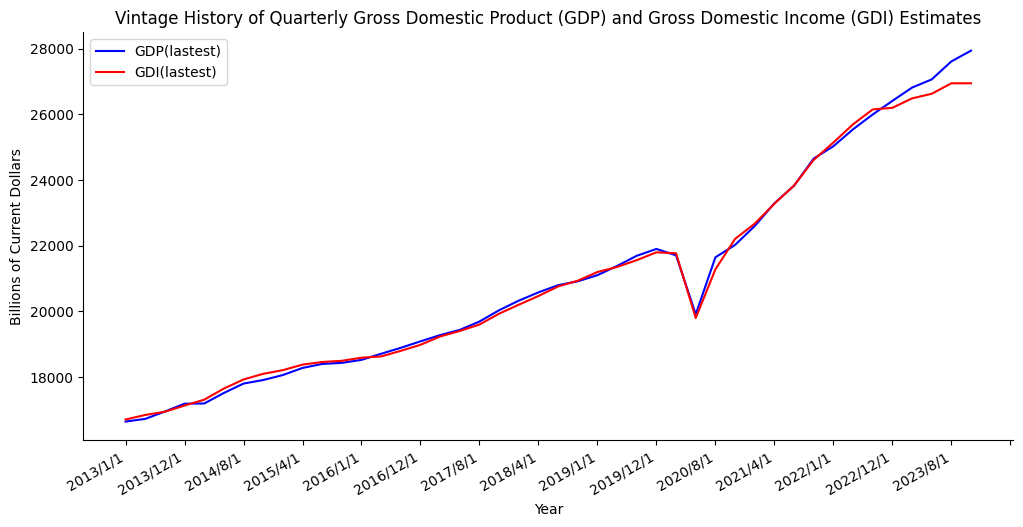

In [14]:
# 创建绘图对象和子图，调整图形尺寸
fig, ax = plt.subplots(figsize=(12, 6))  # 设置宽度为12，高度为6

# 减少x轴标签的显示数目
ax.xaxis.set_major_locator(plt.MaxNLocator(16))

# 绘制折线图
#绘制第一列数据的折线图，使用蓝色
ax.plot(df_GDP_filled['DATE'], df_GDP_filled['GDP'], color='blue', label='GDP(lastest)')

#绘制第二列数据的折线图，使用红色
ax.plot(df_GDP_filled['DATE'], df_GDP_filled['GDI'], color='red', label='GDI(lastest)')

#添加图例
ax.legend()

# 去除上方和右方的边框
sns.despine()

# 设置图表标题和轴标签
plt.title('Vintage History of Quarterly Gross Domestic Product (GDP) and Gross Domestic Income (GDI) Estimates')
plt.xlabel('Year')
plt.ylabel('Billions of Current Dollars')

# 自动调整日期标签的间距，以避免重叠
fig.autofmt_xdate()

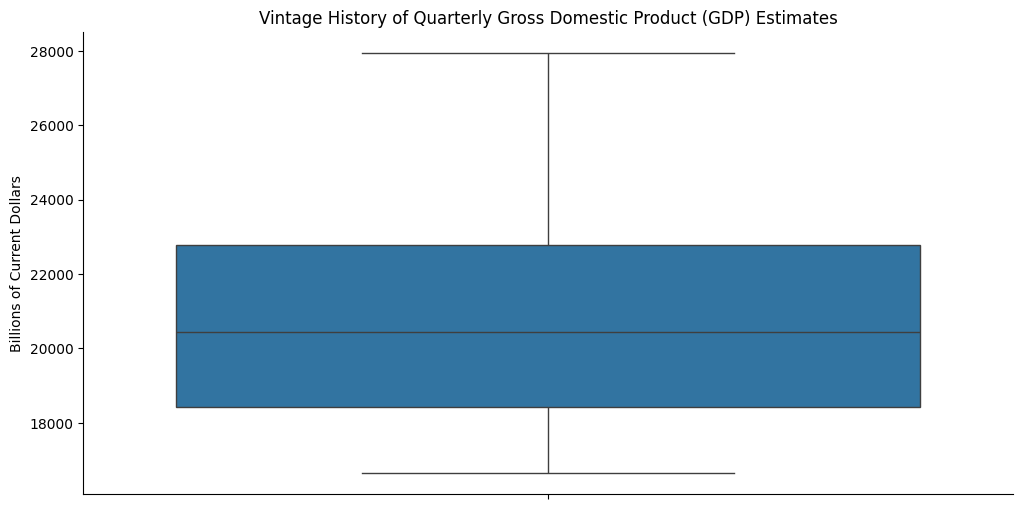

In [15]:
# 创建绘图对象和子图，调整图形尺寸
fig, ax = plt.subplots(figsize=(12, 6))  # 设置宽度为12，高度为6
# 创建箱形图
sns.boxplot(data=df_GDP_filled, y='GDP')
sns.despine()

# 设置图形标题和标签
plt.title('Vintage History of Quarterly Gross Domestic Product (GDP) Estimates')
plt.ylabel('Billions of Current Dollars')

# 显示图形
plt.show()

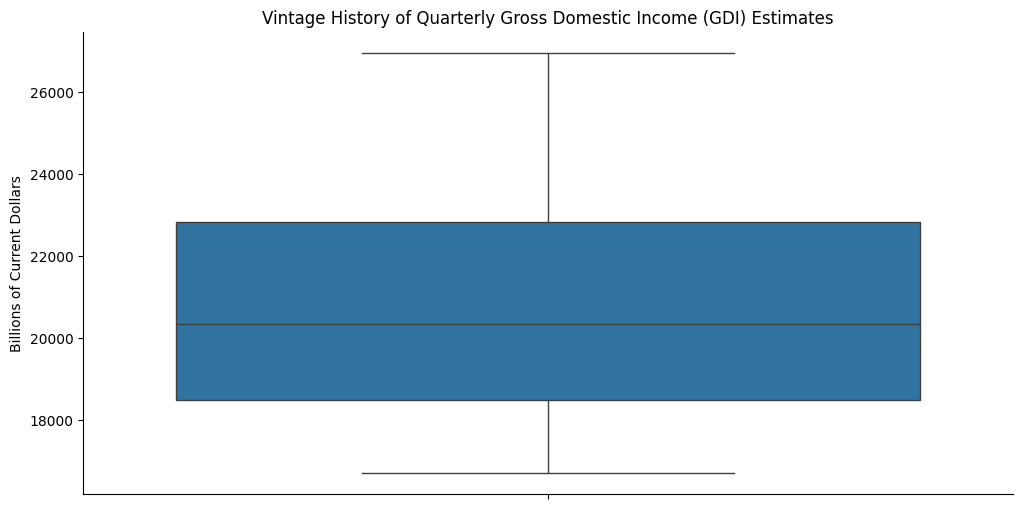

In [16]:
# 创建绘图对象和子图，调整图形尺寸
fig, ax = plt.subplots(figsize=(12, 6))  # 设置宽度为12，高度为6
# 创建箱形图
sns.boxplot(data=df_GDP_filled, y='GDI')
sns.despine()

# 设置图形标题和标签
plt.title('Vintage History of Quarterly Gross Domestic Income (GDI) Estimates')
plt.ylabel('Billions of Current Dollars')

# 显示图形
plt.show()

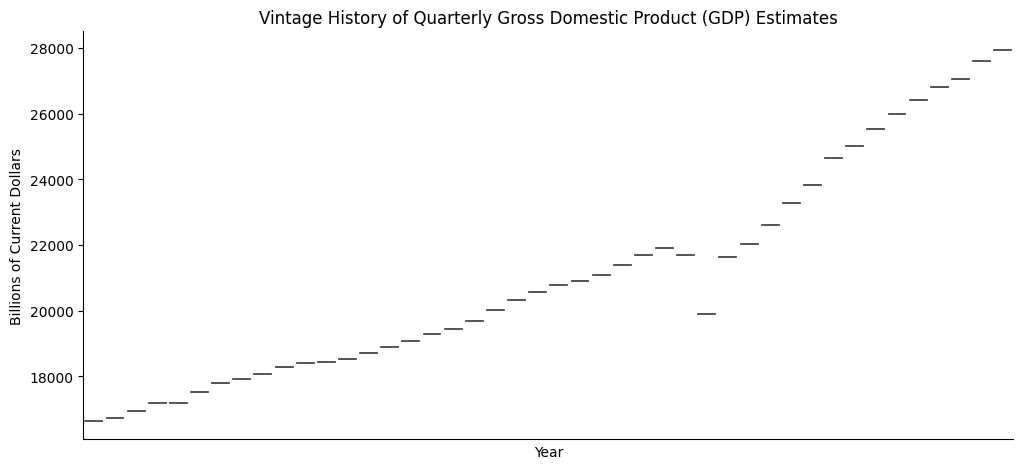

In [17]:
# 创建绘图对象和子图，调整图形尺寸
fig, ax = plt.subplots(figsize=(12, 6))  # 设置宽度为12，高度为6

# 绘制小提琴图
sns.violinplot(data = df_GDP_filled, x = 'DATE', y = 'GDP')

# 去除上方和右方的边框
sns.despine()

# 隐藏X轴刻度标签和刻度线
plt.xticks([])

# 设置图表标题和轴标签
plt.title('Vintage History of Quarterly Gross Domestic Product (GDP) Estimates')
plt.xlabel('Year')
plt.ylabel('Billions of Current Dollars')

# 自动调整日期标签的间距，以避免重叠
fig.autofmt_xdate()

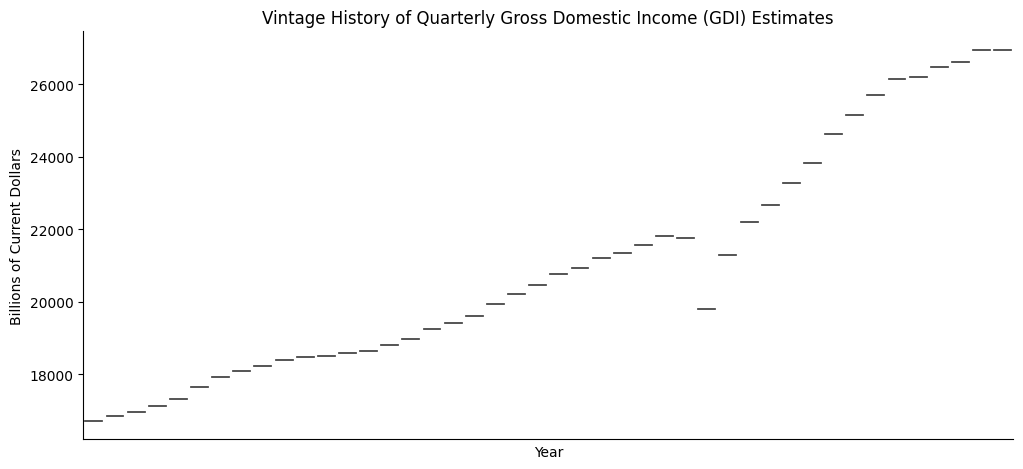

In [18]:
# 创建绘图对象和子图，调整图形尺寸
fig, ax = plt.subplots(figsize=(12, 6))  # 设置宽度为12，高度为6

# 绘制小提琴图
sns.violinplot(data = df_GDP_filled, x = 'DATE', y = 'GDI')

# 去除上方和右方的边框
sns.despine()

# 隐藏X轴刻度标签和刻度线
plt.xticks([])

# 设置图表标题和轴标签
plt.title('Vintage History of Quarterly Gross Domestic Income (GDI) Estimates')
plt.xlabel('Year')
plt.ylabel('Billions of Current Dollars')

# 自动调整日期标签的间距，以避免重叠
fig.autofmt_xdate()

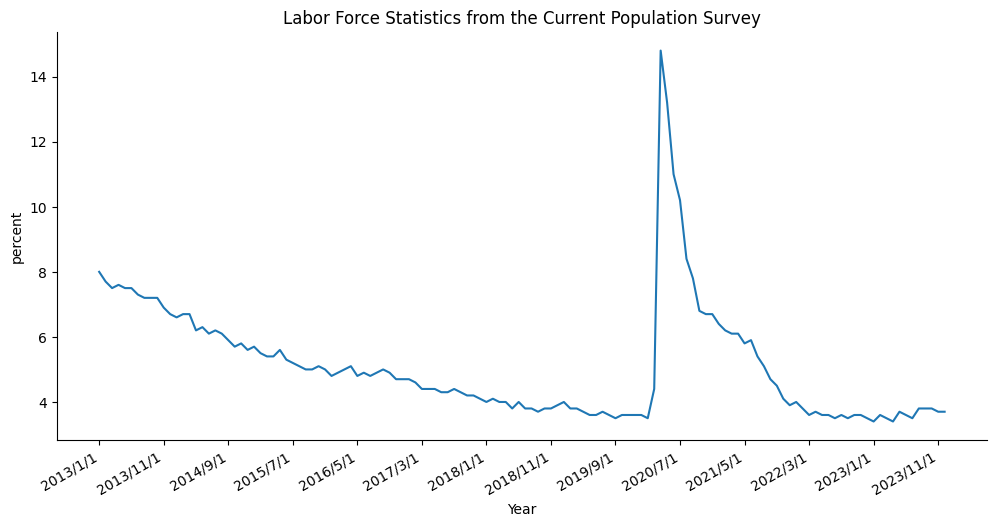

In [19]:
# 创建绘图对象和子图，调整图形尺寸
fig, ax = plt.subplots(figsize=(12, 6))  # 设置宽度为12，高度为6

# 减少x轴标签的显示数目
ax.xaxis.set_major_locator(plt.MaxNLocator(16))

# 绘制折线图
sns.lineplot(data=df_unemployment, x='DATE', y='Unemployment rate', ax=ax)

# 去除上方和右方的边框
sns.despine()

# 设置图表标题和轴标签
plt.title('Labor Force Statistics from the Current Population Survey')
plt.xlabel('Year')
plt.ylabel('percent')

# 自动调整日期标签的间距，以避免重叠
fig.autofmt_xdate()

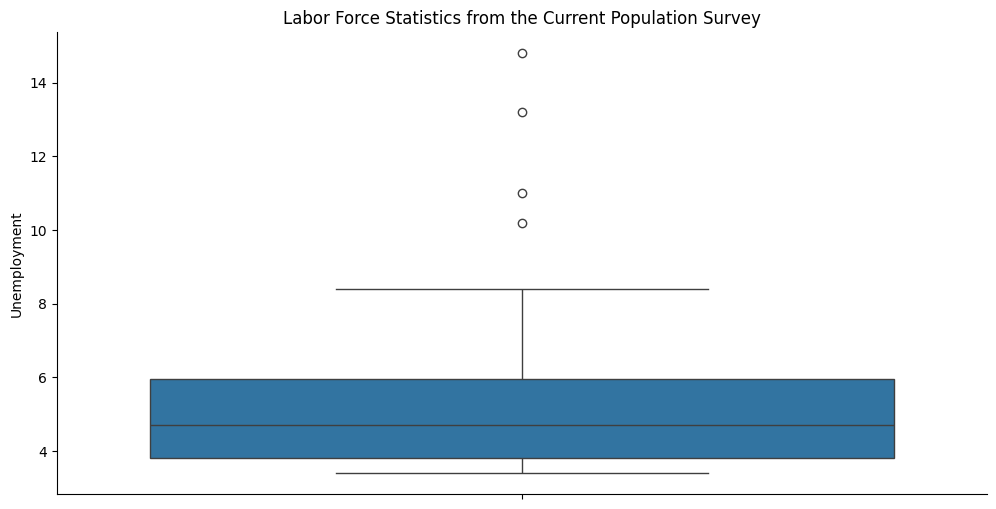

In [20]:
# 创建绘图对象和子图，调整图形尺寸
fig, ax = plt.subplots(figsize=(12, 6))  # 设置宽度为12，高度为6
# 创建箱形图
sns.boxplot(data=df_unemployment, y='Unemployment rate')
sns.despine()

# 设置图形标题和标签
plt.title('Labor Force Statistics from the Current Population Survey')
plt.ylabel('Unemployment')

# 显示图形
plt.show()

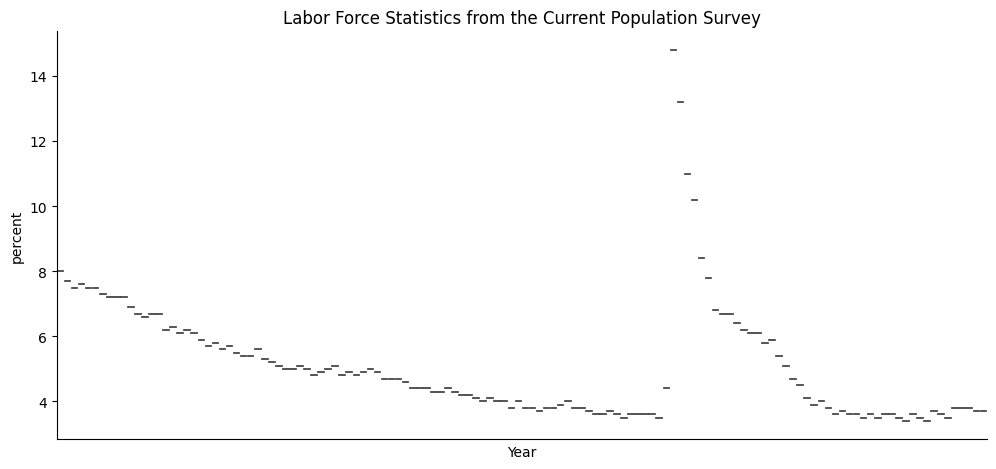

In [21]:
# 创建绘图对象和子图，调整图形尺寸
fig, ax = plt.subplots(figsize=(12, 6))  # 设置宽度为12，高度为6

# 绘制折线图
sns.violinplot(data = df_unemployment, x = 'DATE', y = 'Unemployment rate')

# 去除上方和右方的边框
sns.despine()

# 隐藏X轴刻度标签和刻度线
plt.xticks([])

# 设置图表标题和轴标签
plt.title('Labor Force Statistics from the Current Population Survey')
plt.xlabel('Year')
plt.ylabel('percent')

# 自动调整日期标签的间距，以避免重叠
fig.autofmt_xdate()